# Trabajo Práctico Final - Programación II


Apellido y Nombre: Ruiz, Irma Carolina

TUIA - Comisión 1

## Introducción

*¿Cómo puede mejorarse el uso de la tarjeta SUBE?*

En el presente trabajo, se trabajará sobre datos recolectados sobre el uso de la tarjeta SUBE. Según Wikipedia (2023):

"El Sistema Único de Boleto Electrónico, más conocido como SUBE o Tarjeta SUBE, es un sistema implementado en Argentina a partir del año 2011 que permite a cada usuario con su respectiva tarjeta inteligente, abonar los viajes en colectivos, subtes, trenes y desde enero de 2019, las lanchas de Tigre adheridas a la ‘Red SUBE’, tanto en el transporte público del Área Metropolitana de Buenos Aires (AMBA) como en las líneas de colectivos de las siguientes ciudades: Junín, Mar del Plata, Villa Gesell, Partido de La Costa, Pinamar, General Pico, Necochea, Bahía Blanca, Pergamino, Junín (Buenos Aires), Gran Resistencia, Gran Corrientes, Neuquén, Río Grande, Ushuaia, Formosa, Paraná, Santa Fe, San Salvador de Jujuy, San Juan y Mendoza, entre otras."

Con dicho fin, se establece una situación hipotética en la cual el Ministerio de Transporte quiere decidir si debe aplicar promociones y/o descuentos en el sistema de la tarjeta SUBE, sobre todo fuera de Buenos Aires. Para dicho fin, se utiliza el dataset "dat-ab-usos-2022" ("Cantidad de transacciones SUBE (usos) por día en 2022"), descargado del sitio www.datos.gob.ar.

Por lo anteriormente dicho, el Ministerio tomará decisiones teniendo en cuenta el uso que se hizo de la tarjeta durante el 2022, para promover su uso tanto en temporada vacacional como laboral del 2023. Cabe destacar que si bien se decide enfocar estos cambios en el sistema de colectivos, se tendrá en cuenta otros tipos de transporte, según los resultados obtenidos.

A continuación, se demostrarán tres análisis hechos y luego se desarrollarán las conclusiones.

### Preparación de dataset

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('dat-ab-usos-2022.csv')
data

,DIA_TRANSPORTE,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,CANTIDAD,DATO_PRELIMINAR
0,2022-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,1,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,10,NO
1,2022-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,2B,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,19,NO
2,2022-01-01,EMPRESA BATAN S.A.,BS_AS_LINEA 715M,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1418,NO
3,2022-01-01,COMPAÑIA DE TRANSPORTE VECINAL S.A.,BS_AS_LINEA_326,SI,COLECTIVO,PROVINCIAL,BUENOS AIRES,SN,675,NO
4,2022-01-01,EMPRESA DE TRANSPORTE PERALTA RAMOS SACI,BS_AS_LINEA_512,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1906,NO
...,...,...,...,...,...,...,...,...,...,...
439332,2022-12-31,A T A C O NORTE S A C I,RES_PUERTO_TIROL_Y VIC,NO,COLECTIVO,PROVINCIAL,CHACO,SN,1015,NO
439333,2022-12-31,ETACER SRL,STAFE_SANTA FE_LINEA_907,NO,COLECTIVO,NACIONAL,JN,SD,807,NO
439334,2022-12-31,COOP. DE PROVISION DE SERVICIOS 1 DE SEPTIEMBR...,STEFENELLI - LA COSTA,NO,COLECTIVO,MUNICIPAL,RÍO NEGRO,GENERAL ROCA,54,NO
439335,2022-12-31,TRANSPORTE CASTELLI S.R.L.,TD-02,NO,COLECTIVO,PROVINCIAL,NEUQUÉN,SN,295,NO


## Desarrollo

### **1° análisis: Diez líneas y municipios que más usan la tarjeta fuera de Buenos Aires**

In [4]:
info1 = data[(data['CANTIDAD']!=0)&(data['PROVINCIA']!='BUENOS AIRES')&(data['TIPO_TRANSPORTE']=='COLECTIVO')&(~data['LINEA'].str.contains('BSAS_LINEA_|BS_ASLINEA_'))]
info1b = info1.groupby(['LINEA', 'MUNICIPIO', 'PROVINCIA']).sum().head(10)
a = info1b.sort_values(by="CANTIDAD", ascending=False)
a

,,,CANTIDAD
LINEA,MUNICIPIO,PROVINCIA,
INTERURB DE TRANSP-SERV.DIFERENCIAL,SN,CHUBUT,269530
LINEA 01,RECONQUISTA,SANTA FE,159059
LINEA 02,RECONQUISTA,SANTA FE,47914
BARRIO NUEVO,GENERAL ROCA,RÍO NEGRO,19260
LINEA 04,RECONQUISTA,SANTA FE,14834
LINEA 03,RECONQUISTA,SANTA FE,14332
J.J. GOMEZ - ALTA BARDA,GENERAL ROCA,RÍO NEGRO,13453
CHACRA MONTE - PAISSANIDIS,GENERAL ROCA,RÍO NEGRO,8137
ISLAS MALVINAS - PUENTE CERO,GENERAL ROCA,RÍO NEGRO,6370


### **2° análisis: Empresas que menos consumo tienen con jurisdicción nacional**

In [5]:
info2 = data[(data['TIPO_TRANSPORTE']=='COLECTIVO')&(data['JURISDICCION']=='NACIONAL')&(data['PROVINCIA']=='JN')&(data['CANTIDAD']<=5)]
info2b = info2.groupby(['NOMBRE_EMPRESA','JURISDICCION', 'PROVINCIA']).sum()
b = info2b.sort_values(by="CANTIDAD", ascending=True)
b

,,,CANTIDAD
NOMBRE_EMPRESA,JURISDICCION,PROVINCIA,
AZUL S.A. DE TRANSPORTE AUTOMOTOR,NACIONAL,JN,5
EMPRESA RIO URUGUAY SRL,NACIONAL,JN,24


### **3° análisis: Dos tipos de transportes (no colectivos) más usados durante época de vacaciones (enero y julio)**

In [6]:
info3 = data[(data['TIPO_TRANSPORTE']!='COLECTIVO')&(data['CANTIDAD']>0)&(data['DIA_TRANSPORTE'].str.contains('2022-07|2022-12'))&(data['PROVINCIA'].notnull())]
info3b = info3.groupby(['TIPO_TRANSPORTE', 'DIA_TRANSPORTE', 'PROVINCIA']).sum()
info3c = info3b.sort_values(by="CANTIDAD", ascending=False)
info3c

CANTIDAD
TIPO_TRANSPORTE DIA_TRANSPORTE PROVINCIA             
TREN            2022-12-22     JN             1312134
                2022-12-02     JN             1311282
                2022-12-16     JN             1283573
                2022-07-14     JN             1272426
                2022-12-21     JN             1259470
...                                               ...
LANCHAS         2022-07-02     BUENOS AIRES        18
                2022-07-31     BUENOS AIRES        17
                2022-07-25     BUENOS AIRES        16
                2022-12-18     BUENOS AIRES        16
                2022-07-03     BUENOS AIRES         9

[121 rows x 1 columns]

In [7]:
c = info3c['CANTIDAD'].groupby(['TIPO_TRANSPORTE']).sum().sort_values(ascending=False)
c

TIPO_TRANSPORTE
TREN       55818815
LANCHAS        2218
Name: CANTIDAD, dtype: int64

### Gráficos y conclusiones

In [8]:
import matplotlib.pyplot as plt
import numpy as np

def grafico_barras(titulo, titulo_x, titulo_y, etiquetas_x, datos_y, angulo, tamaño):
    plt.figure(figsize=tamaño)   # dimensiones del gráfico
    plt.xticks(rotation=angulo,fontsize=15);
    plt.yticks(fontsize=15);               
    plt.xlabel(titulo_x,fontsize=15) 
    plt.ylabel(titulo_y,fontsize=15)
    plt.title(titulo,fontsize=20)                    
    plt.bar(etiquetas_x,datos_y)

def grafico_torta(titulo, etiquetas, valores, tamaño):
  plt.figure(figsize = tamaño)
  plt.title(titulo,fontsize=20)
  plt.pie(valores, labels  = etiquetas, autopct = "%0.1f %%") #autopct="%0.1f %%" -> los porcentajes dentro de cada parte

Teniendo en cuenta el primer análisis, se puede observar que las provincias que tienen más lineas y municipios que usan la tarjeta SUBE son Chubut, Santa Fe y Río Negro. Estos resultados son a nivel anual, por lo que el Ministerio decidirá invertir en las diez líneas señaladas (repetidas en el siguiente gráfico) para que aumente la cantidad de unidades, así como realizar nuevos análisis en el futuro próximo para implementar descuentos a estudiantes, jubilados, etc.

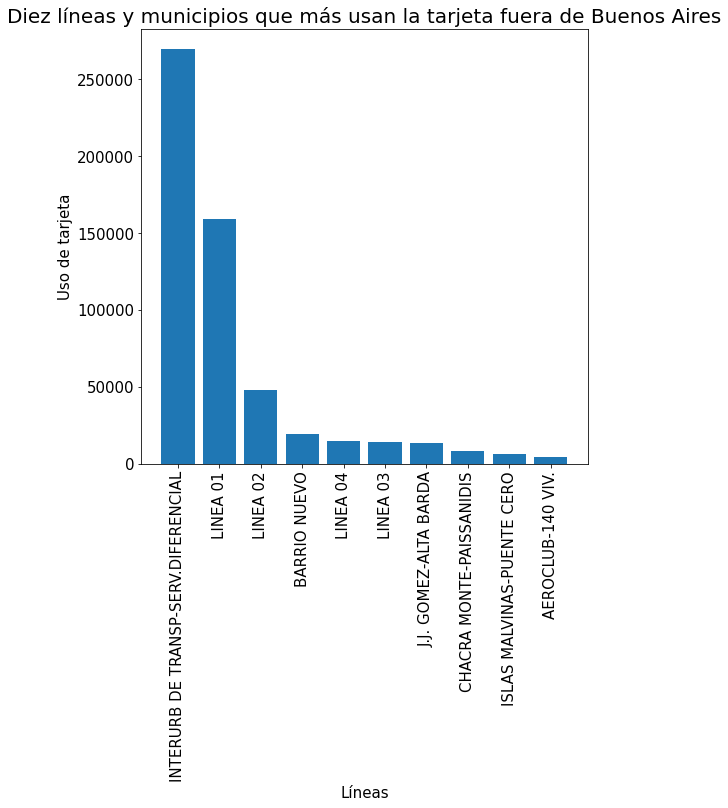

In [15]:
x_labels = ['INTERURB DE TRANSP-SERV.DIFERENCIAL', 'LINEA 01', 'LINEA 02', 'BARRIO NUEVO', 'LINEA 04', 'LINEA 03', 'J.J. GOMEZ-ALTA BARDA', 'CHACRA MONTE-PAISSANIDIS', 'ISLAS MALVINAS-PUENTE CERO', 'AEROCLUB-140 VIV.']
y = pd.Series(a['CANTIDAD'])
y_data = list(y)
grafico_barras('Diez líneas y municipios que más usan la tarjeta fuera de Buenos Aires', 'Líneas', 'Uso de tarjeta', x_labels, y_data, angulo=90, tamaño = (8,8))

Por otro lado, a través del segundo análisis se detectaron dos empresas que no fueron muy usadas durante el 2022. Debido a que ambas tienen jurisdicción nacional, el Ministerio evaluará sus recorridos y, en caso de que viajen por lugares clave para el desarrollo económico, evaluarán descuentos y/o cambios en el recorrido (o fuisón entre ambos) para fomentar su uso.

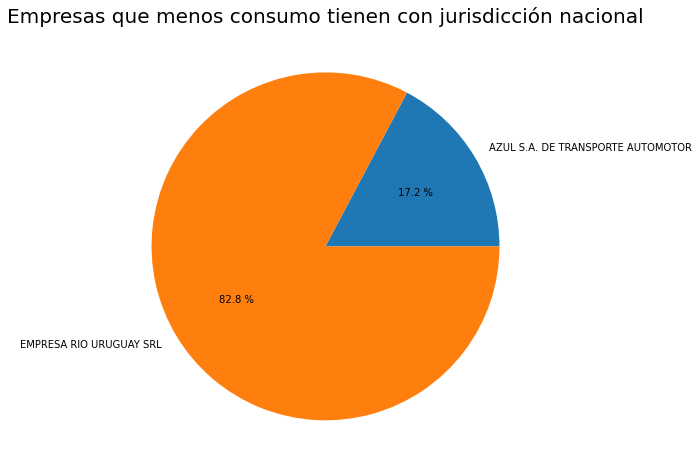

In [22]:
labels = ['AZUL S.A. DE TRANSPORTE AUTOMOTOR', 'EMPRESA RIO URUGUAY SRL']
cantidades = [5, 24]
grafico_torta('Empresas que menos consumo tienen con jurisdicción nacional', labels, cantidades,tamaño=(8,8))

Finalmente, el tercer análisis determina que la tarjeta se usa mucho para acceder a trenes y lanchas. Esto ocurrió en la temporada vacacional (julio y diciembre) del 2022, por lo que se espera que el presente año también ocurra. Asimismo, se observa que los trenes obtuvieron muchos más usos que las lanchas. Por estas razones, se decidirá aplicar descuentos a familias numerosas y jubilados durante las vacaciones para que el uso de trenes se mantenga (o supere) a nivel nacional. Por otro lado, en la provincia de Buenos Aires se desarrollarán promociones para que las lanchas tengan más uso sobre todo en la temporada de verano, y así también fomentar el turismo relacionado al río.

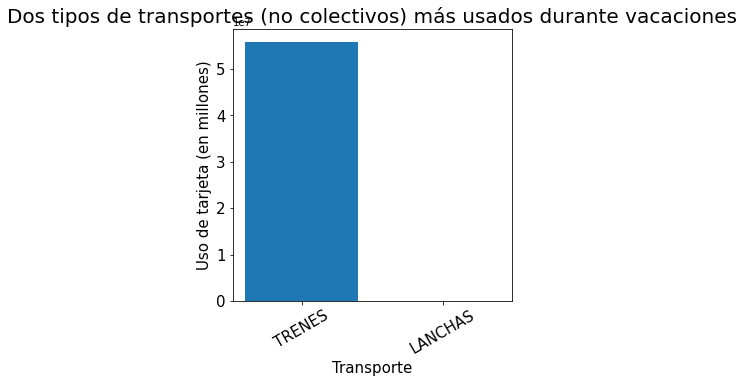

In [24]:
x_labels2 = ['TRENES', 'LANCHAS']
y_data2 = [c[0], c[1]]
grafico_barras('Dos tipos de transportes (no colectivos) más usados durante vacaciones', 'Transporte', 'Uso de tarjeta (en millones)', x_labels2, y_data2, angulo=30, tamaño = (5,5))

### Fuentes

Sobre el Sistema SUBE:
https://es.wikipedia.org/wiki/Sistema_%C3%9Anico_de_Boleto_Electr%C3%B3nico

Archivo csv:
https://www.datos.gob.ar/dataset/transporte-sube---cantidad-transacciones-usos-por-fecha/archivo/transporte_93410ab1-88df-457a-8e24-262d41211f9c